<a href="https://colab.research.google.com/github/GnanaKishore/EV/blob/main/EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [4]:
data =pd.read_csv("EV.csv")
data.head()

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
0,Audi RS e-tron GT,93,480,5,9,204,250,Automatic
1,Audi e-tron GT,93,500,5,9,179,245,Automatic
2,Audi e-tron,95,484,5,9,123,200,Automatic
3,Tata Nexon EV,30,312,5,9,17,180,Automatic
4,Tata Tigor EV,26,306,5,9,14,120,Automatic


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand Name        18 non-null     object
 1   Battery Capacity  18 non-null     int64 
 2   Range             18 non-null     int64 
 3   Num of Seats      18 non-null     int64 
 4   Charging T        18 non-null     int64 
 5   Price             18 non-null     int64 
 6   TopSpeed          18 non-null     int64 
 7   Transmission      18 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.2+ KB


In [6]:
print(pd.isnull(data).sum())

Brand Name          0
Battery Capacity    0
Range               0
Num of Seats        0
Charging T          0
Price               0
TopSpeed            0
Transmission        0
dtype: int64


In [7]:
data.columns

Index(['Brand Name', 'Battery Capacity', 'Range', 'Num of Seats', 'Charging T',
       'Price', 'TopSpeed', 'Transmission'],
      dtype='object')

In [8]:
data.describe(include='all')

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
count,18,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18
unique,18,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Audi RS e-tron GT,NaN,NaN,NaN,NaN,NaN,NaN,Automatic
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,18
mean,NaN,62.277778,396.944444,4.944444,15.666667,75.111111,180.888889,NaN
std,NaN,28.725487,116.619276,0.235702,11.591072,63.751253,56.527858,NaN
min,NaN,10.000000,100.000000,4.000000,7.000000,9.000000,80.000000,NaN
25%,NaN,39.250000,358.500000,5.000000,9.000000,18.500000,128.750000,NaN
50%,NaN,71.000000,434.000000,5.000000,9.500000,64.500000,190.000000,NaN
75%,NaN,87.500000,477.750000,5.000000,19.000000,114.250000,233.750000,NaN


In [9]:
data['Transmission'] = data['Transmission'].astype('category')
data['Transmission'] = data['Transmission'].cat.codes

data['Brand Name'] = data['Brand Name'].astype('category')
data['Brand Name'] = data['Brand Name'].cat.codes

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Brand Name        18 non-null     int8 
 1   Battery Capacity  18 non-null     int64
 2   Range             18 non-null     int64
 3   Num of Seats      18 non-null     int64
 4   Charging T        18 non-null     int64
 5   Price             18 non-null     int64
 6   TopSpeed          18 non-null     int64
 7   Transmission      18 non-null     int8 
dtypes: int64(6), int8(2)
memory usage: 1.0 KB


In [11]:
data.isna().sum()

Brand Name          0
Battery Capacity    0
Range               0
Num of Seats        0
Charging T          0
Price               0
TopSpeed            0
Transmission        0
dtype: int64

In [12]:
data.corr()


,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
Brand Name,1.000000,-0.598584,-0.429949,-0.070122,-0.125481,-0.504169,-0.262173,NaN
Battery Capacity,-0.598584,1.000000,0.829061,0.454189,0.438610,0.841789,0.678679,NaN
Range,-0.429949,0.829061,1.000000,0.635466,0.286326,0.598219,0.769523,NaN
Num of Seats,-0.070122,0.454189,0.635466,1.000000,0.165071,0.258805,0.445418,NaN
Charging T,-0.125481,0.438610,0.286326,0.165071,1.000000,0.168974,0.037377,NaN
Price,-0.504169,0.841789,0.598219,0.258805,0.168974,1.000000,0.721774,NaN
TopSpeed,-0.262173,0.678679,0.769523,0.445418,0.037377,0.721774,1.000000,NaN
Transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


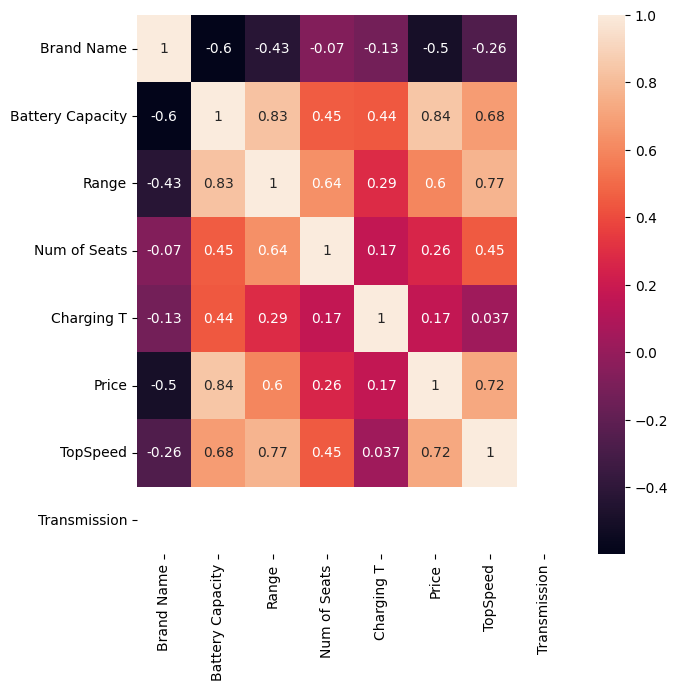

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

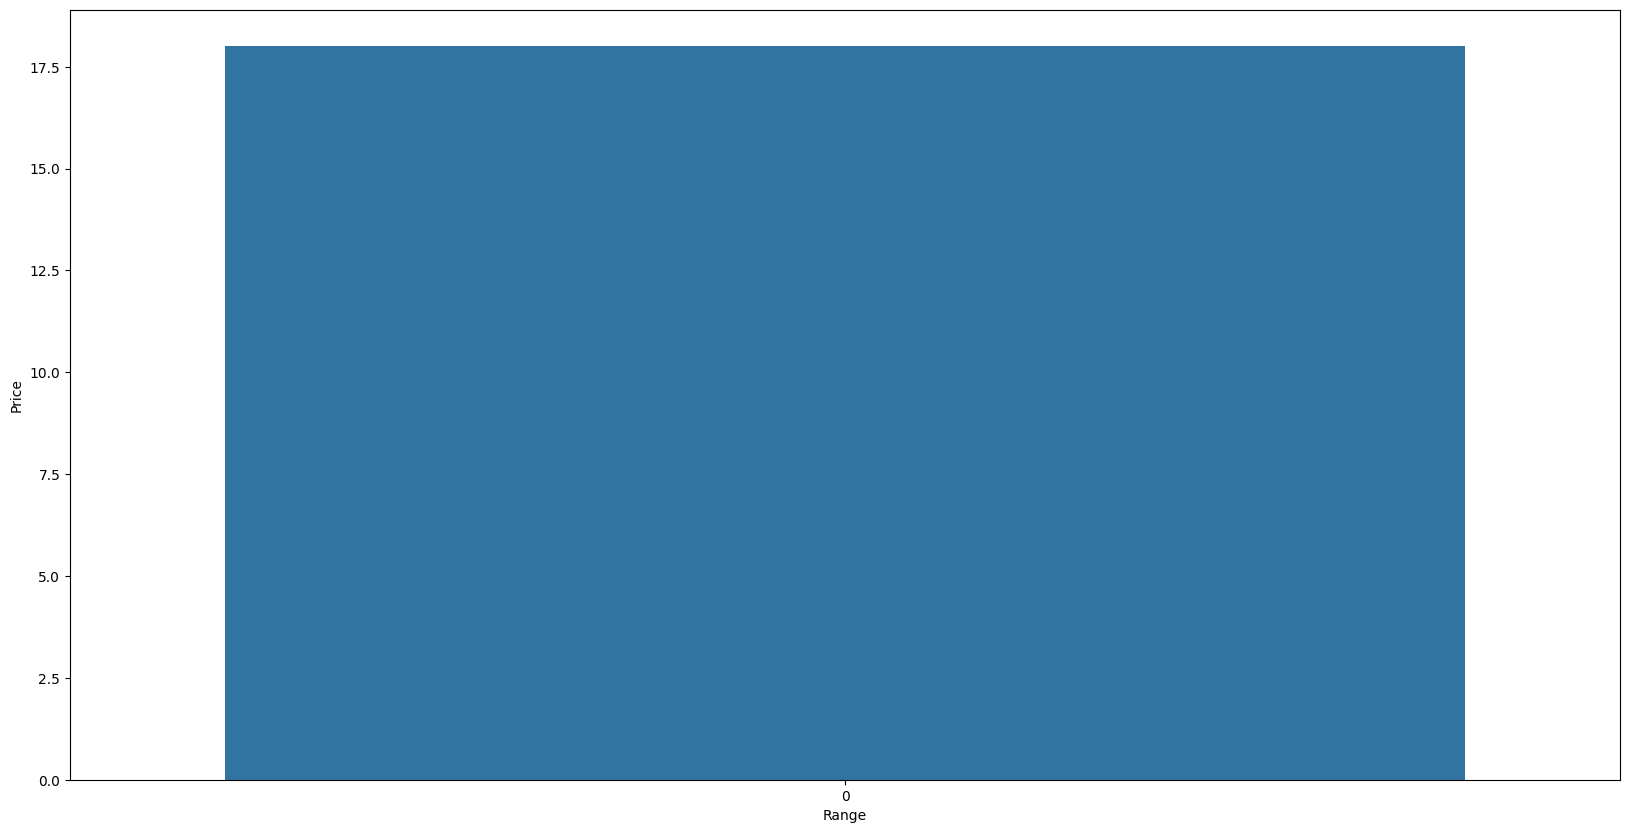

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(data.Price)
plt.xlabel("Range")
plt.ylabel("Price")
plt.show()

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Brand Name        18 non-null     int8 
 1   Battery Capacity  18 non-null     int64
 2   Range             18 non-null     int64
 3   Num of Seats      18 non-null     int64
 4   Charging T        18 non-null     int64
 5   Price             18 non-null     int64
 6   TopSpeed          18 non-null     int64
 7   Transmission      18 non-null     int8 
dtypes: int64(6), int8(2)
memory usage: 1.0 KB


In [16]:
data = data.drop(columns= ['Brand Name'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

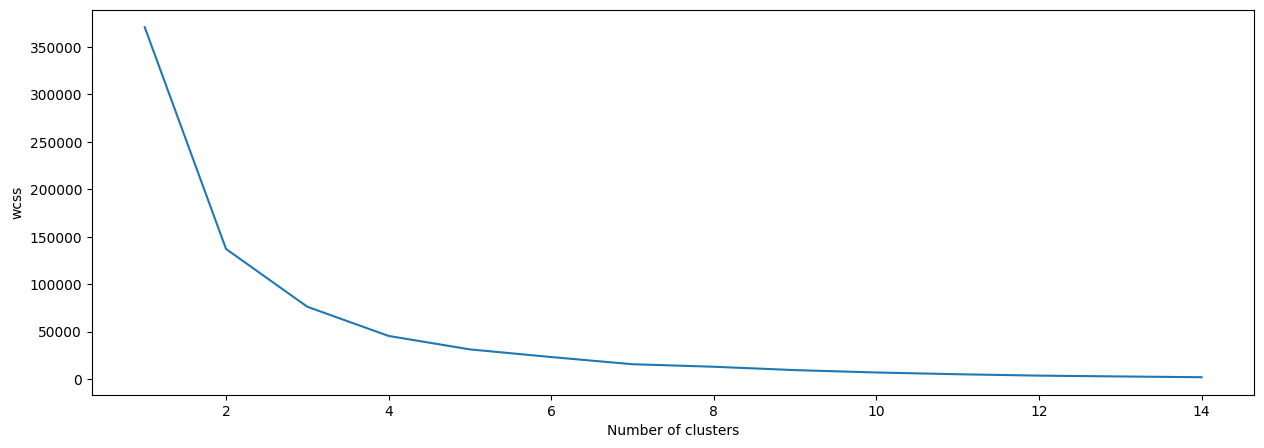

In [17]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(data)
data['cluster_number'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
data

,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission,cluster_number
0,93,480,5,9,204,250,0,0
1,93,500,5,9,179,245,0,0
2,95,484,5,9,123,200,0,0
3,30,312,5,9,17,180,0,1
4,26,306,5,9,14,120,0,1
5,39,452,5,7,24,155,0,3
6,90,470,5,13,112,200,0,0
7,21,140,5,12,10,86,0,2
8,44,340,5,8,25,120,0,1
9,80,414,5,21,100,180,0,0


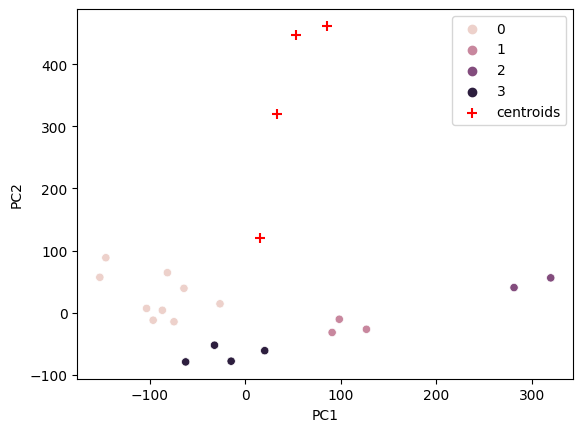

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = data.values
pca = preprocessing.scale(x)
pca = PCA(n_components=8)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(8)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

<Axes: xlabel='cluster_number', ylabel='Range'>

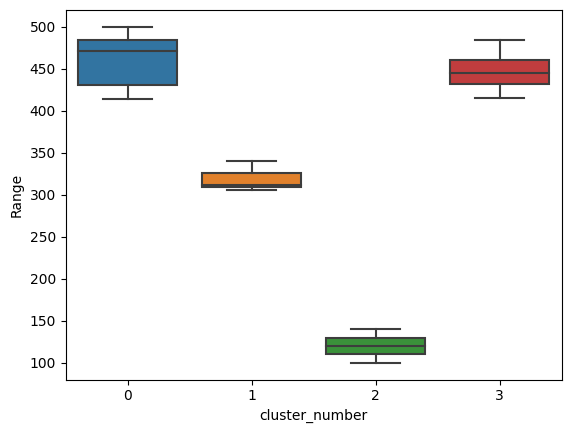

In [21]:
sns.boxplot(x='cluster_number', y='Range', data=data)

<Axes: xlabel='cluster_number', ylabel='Battery Capacity'>

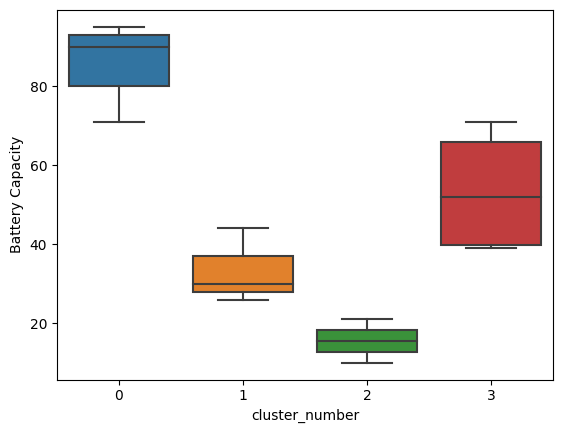

In [22]:
sns.boxplot(x='cluster_number', y='Battery Capacity', data=data)

<Axes: xlabel='cluster_number', ylabel='Price'>

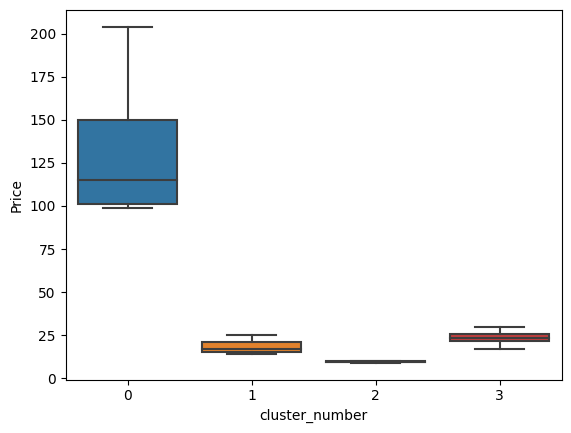

In [23]:
sns.boxplot(x='cluster_number', y='Price', data=data)

<Axes: xlabel='cluster_number', ylabel='Charging T'>

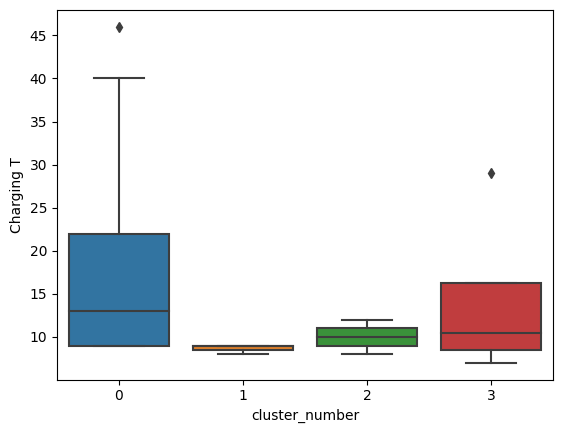

In [24]:
sns.boxplot(x='cluster_number', y='Charging T', data=data)

<Axes: xlabel='cluster_number', ylabel='TopSpeed'>

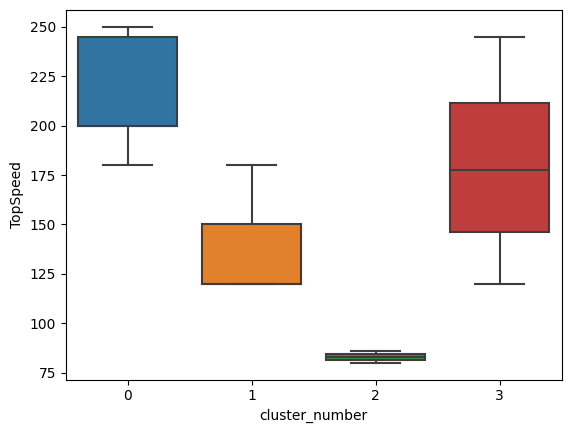

In [25]:
sns.boxplot(x='cluster_number', y='TopSpeed', data=data)

Inferences:

When compared to other clusters, vehicles in cluster 0 are more expensive.
Vehicles from cluster 0 have a wider range than those from other clusters.

Vehicles having a long-range require more time to charge than those with a shorter range.
Vehicles in cluster 0 have a larger battery capacity than other vehicles.

Marketing Mix:

The range of new electric vehicles must be greater than 400 kilometers.
The car's charge time must be under 15 hours.
The vehicle's top speed must exceed 200 kph.
To increase sales, the car's battery capacity must be more than 80.